In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [38]:
df['high_rating'] = df['Rating'].apply(lambda x: 1 if x >= 7 else 0)

print("Target distribution (High Rating vs Low Rating):\n")
counts = df['high_rating'].value_counts()
print(f"High Rating (1): {counts[1]}")
print(f"Low Rating  (0): {counts[0]}")

Target distribution (High Rating vs Low Rating):

High Rating (1): 501
Low Rating  (0): 499


In [39]:
features = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Total', 'Payment']
X = df[features]
y = df['high_rating']

In [7]:
categorical_features = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
numerical_features = ['Unit price', 'Quantity', 'Total']

encoder = OneHotEncoder(sparse_output=False)
X_categorical = encoder.fit_transform(X[categorical_features])

X_numerical = X[numerical_features].values
X_final = np.hstack((X_categorical, X_numerical))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

In [9]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("\nClassification Report:")

report_dict = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

report_df.round(2)


Classification Report:


,precision,recall,f1-score,support
0,0.46,0.45,0.45,103.00
1,0.43,0.44,0.44,97.00
accuracy,0.44,0.44,0.44,0.44
macro avg,0.44,0.44,0.44,200.00
weighted avg,0.45,0.44,0.45,200.00


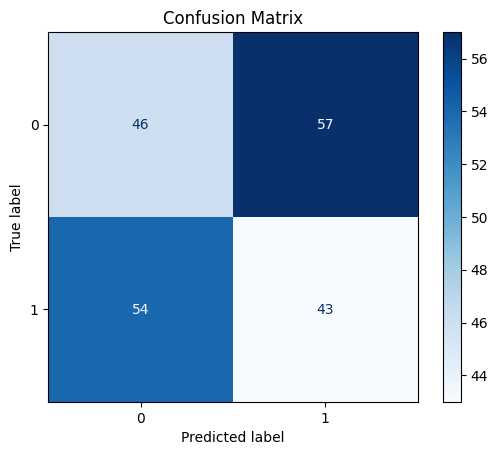

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]
print("\nIndices of first 5 misclassified samples:", misclassified_indices[:5])


Indices of first 5 misclassified samples: [0 1 2 3 6]


In [ ]:
feature_names = encoder.get_feature_names_out(categorical_features)
full_feature_names = list(feature_names) + numerical_features

X_test_df = pd.DataFrame(X_test, columns=full_feature_names)
X_test_df['true_label'] = y_test.values
X_test_df['predicted_label'] = y_pred

misclassified_df = X_test_df.iloc[misclassified_indices[:5]]
misclassified_df

,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,Customer type_Member,Customer type_Normal,Gender_Female,Gender_Male,...,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet,Unit price,Quantity,Total,true_label,predicted_label
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,83.17,6.0,523.9710,1,0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,58.76,10.0,616.9800,1,0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,55.61,7.0,408.7335,1,0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,42.97,3.0,135.3555,1,0
6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,60.87,2.0,127.8270,1,0


In [ ]:
original_X_test = X.reset_index(drop=True).iloc[y_test.index]

misclassified_rows = original_X_test.iloc[misclassified_indices[:5]].copy()

misclassified_rows['True Label'] = y_test.iloc[misclassified_indices[:5]].values
misclassified_rows['Predicted Label'] = y_pred[misclassified_indices[:5]]
misclassified_rows

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Payment,True Label,Predicted Label
521,C,Naypyitaw,Member,Female,Home and lifestyle,83.17,6,523.9710,Cash,1,0
737,C,Naypyitaw,Normal,Male,Electronic accessories,58.76,10,616.9800,Ewallet,1,0
740,C,Naypyitaw,Normal,Male,Home and lifestyle,55.61,7,408.7335,Cash,1,0
660,B,Mandalay,Normal,Female,Sports and travel,42.97,3,135.3555,Cash,1,0
626,A,Yangon,Normal,Male,Sports and travel,60.87,2,127.8270,Ewallet,1,0
